# Desafio K-Means

# Importação de bibliotecas necessárias

In [157]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, accuracy_score, f1_score
import gdown

# Importando os arquivos necessários

In [158]:
#Arquivo de features teste
url_xtest = 'https://drive.google.com/uc?id=163eoP9k37sYtDHWGUcsr7417Uwmnn1NE'
output_xtest = 'X_test.txt'
gdown.download(url_xtest, output_xtest, quiet=False)

#Arquivo de features treino
url_xtrain = 'https://drive.google.com/uc?id=1ZFdN0ygbhUB1MsFb4TKuHOpD6Yovwdes'
output_xtrain = 'X_train.txt'
gdown.download(url_xtrain, output_xtrain, quiet=False)

#Arquivo com nome das features
url_features = 'https://drive.google.com/uc?id=1Ps-NmgOuAp0wr0LxFSTUIT5aopoYSo2z'
output_features = 'features.txt'
gdown.download(url_features, output_features, quiet=False)

url_ytest = 'https://drive.google.com/uc?id=1yB31OeW7UuX79fDTR3NlutyXkgnxf5Qx'
output_ytest = 'ytest.txt'
gdown.download(url_ytest, output_ytest, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=163eoP9k37sYtDHWGUcsr7417Uwmnn1NE
To: c:\Users\Lenovo\Documents\MeusProjetos\Desafio-em-Dupla-K-Means\src\X_test.txt
100%|██████████| 26.5M/26.5M [00:02<00:00, 12.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ZFdN0ygbhUB1MsFb4TKuHOpD6Yovwdes
To: c:\Users\Lenovo\Documents\MeusProjetos\Desafio-em-Dupla-K-Means\src\X_train.txt
100%|██████████| 66.0M/66.0M [00:02<00:00, 28.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Ps-NmgOuAp0wr0LxFSTUIT5aopoYSo2z
To: c:\Users\Lenovo\Documents\MeusProjetos\Desafio-em-Dupla-K-Means\src\features.txt
100%|██████████| 15.8k/15.8k [00:00<00:00, 3.14MB/s]
Downloading...
From: https://drive.google.com/uc?id=1yB31OeW7UuX79fDTR3NlutyXkgnxf5Qx
To: c:\Users\Lenovo\Documents\MeusProjetos\Desafio-em-Dupla-K-Means\src\ytest.txt
100%|██████████| 5.89k/5.89k [00:00<00:00, 1.97MB/s]


'ytest.txt'

In [159]:
dados = pd.read_csv('X_train.txt', delim_whitespace=True, header=None)

dados_teste = pd.read_csv('X_test.txt', delim_whitespace=True, header=None)

# Análise exploratória dos dados

In [160]:
dados_teste.shape, dados.shape

((2947, 561), (7352, 561))

In [161]:
# Informações do Dataframe
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, 0 to 560
dtypes: float64(561)
memory usage: 31.5 MB


In [162]:
# Estatísticas descritivas 
dados.describe()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,0.125293,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.250994,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.023692,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,0.134000,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,0.289096,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.946700,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000


In [163]:
#Verificando valores NaN
dados.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
556    0
557    0
558    0
559    0
560    0
Length: 561, dtype: int64

# Tratamento dos dados

## Renomeando as colunas com o arquivo .txt de features

In [164]:
#Carregando o arquivo com nome das features
features_df = pd.read_csv('features.txt', delimiter=' ', header=None, usecols=[1]) 

#Pegando a segunda coluna que tem os nomes
features = features_df[1]

#Renomeando nos dados
dados.columns, dados_teste.columns = features, features

dados.head()

1,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


## Análise de Componentes Principais (PCA)

### Definindo o número de componentes para explicar 95% de variância

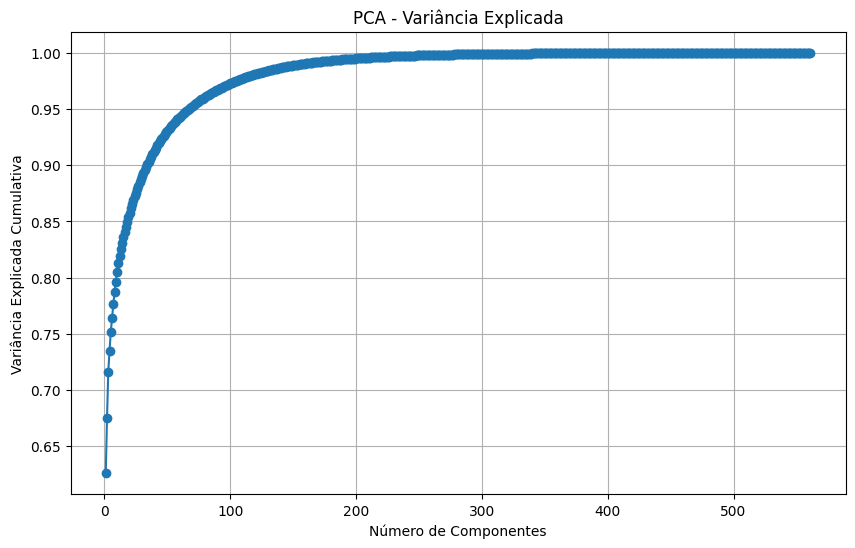

Número de componentes para explicar 95% da variância: 67


In [165]:
pca = PCA()
pca.fit(dados)

# Variância explicada cumulativa
variancia_explicada = pca.explained_variance_ratio_.cumsum()

# Plot da variância explicada
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(variancia_explicada) + 1), variancia_explicada, marker='o')
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Explicada Cumulativa')
plt.title('PCA - Variância Explicada')
plt.grid()
plt.show()

# Número de componentes para 95% da variância
n_componentes_95 = next(i for i, v in enumerate(variancia_explicada) if v >= 0.95) + 1
print(f"Número de componentes para explicar 95% da variância: {n_componentes_95}")

In [166]:
# Redução de dimensionalidade com PCA (sem normalização adicional)
pca = PCA(n_components=67)  # Reduzindo para 67 componentes principais
dados_pca = pca.fit_transform(dados)

# Aplicação do K-means
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)  # Exemplo com 3 clusters
clusters = kmeans.fit_predict(dados_pca)

# Adicionando os clusters ao DataFrame original
dados['Cluster'] = clusters

## Visualizando as correlações entre os componentes principais

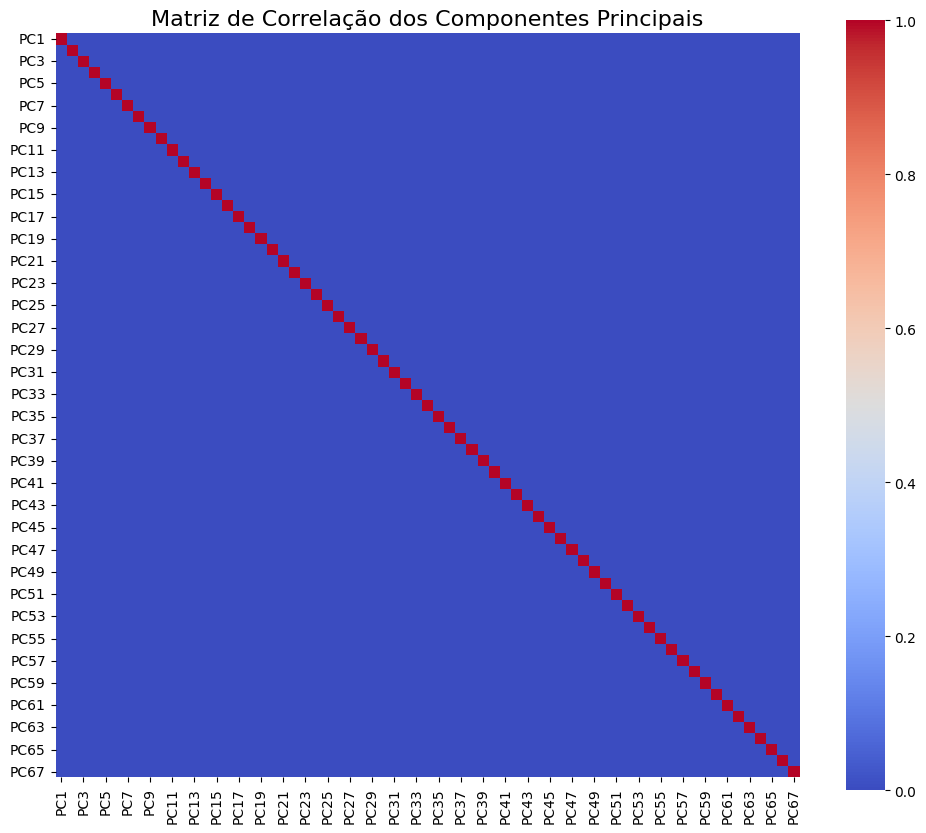

In [167]:
# Transformando os componentes principais em um DataFrame para facilitar a análise
df_pca = pd.DataFrame(dados_pca, columns=[f'PC{i+1}' for i in range(67)])

# Calculando a matriz de correlação
matriz_corr = df_pca.corr()

# Criando o heatmap de correlação
plt.figure(figsize=(12, 10))
sns.heatmap(matriz_corr, annot=False, cmap='coolwarm', cbar=True, square=True)
plt.title('Matriz de Correlação dos Componentes Principais', fontsize=16)
plt.show()

Porque não houve correlação entre os componentes?

Pela própria característica do PCA, que é baseado na decomposição da matriz de covariância dos dados. Ele encontra os autovetores e os ordena pelos seus respectivos autovalores, que indicam a variância explicada. Os autovetores são escolhidos de forma a serem ortogonais, o que elimina qualquer correlação linear entre os componentes.

# Escolha do número de clusters (K)

## Método do cotovelo (Elbow Method)

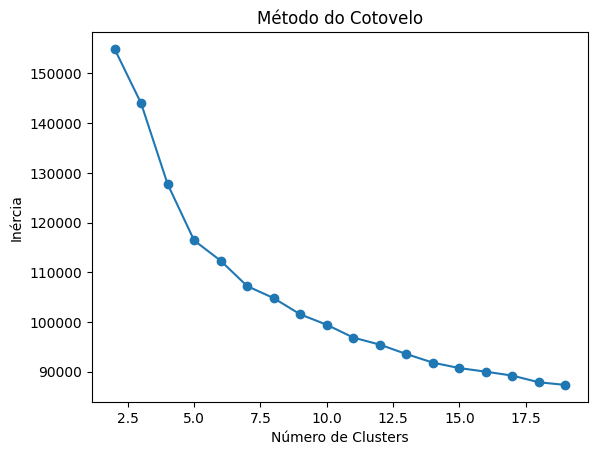

In [168]:
# Método do cotovelo
inertia = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(df_pca)
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 20), inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo')
plt.show()

Observa-se um cotovelo para K=6

## Coeficiente silhueta (Silhouette Score)

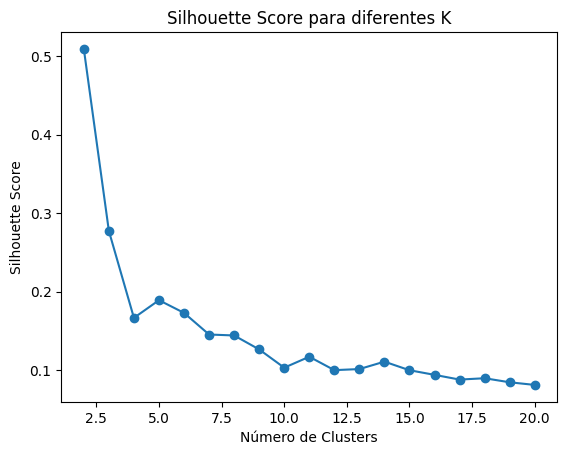

In [169]:
silhouette_scores = []
for k in range(2, 21):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    clusters = kmeans.fit_predict(df_pca)
    score = silhouette_score(df_pca, clusters)
    silhouette_scores.append(score)

plt.plot(range(2, 21), silhouette_scores, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score para diferentes K')
plt.show()

Buscamos o maior valor do coeficiente silhueta, que nesse caso é com 2 clusters. Porém, conhecendo os dados e combinando a análise do cotovelo, percebe-se que o coeficiente silhueta cresce para K=6 também. Assim, serão definidos 6 clusters, o que faz sentido, pois os dados dos sensores estavam avaliando as atividades:
(WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING), totalizando 6 atividades humanas.

# Implementação do Kmeans para 6 clusters

In [170]:
def treino_kmeans_pca(dataframe, var=0.95, k=6):

    df_copy = dataframe.copy()
    pca = PCA()
    pca.fit(df_copy)

    # Variância explicada cumulativa
    variancia_explicada = pca.explained_variance_ratio_.cumsum()

    # Número de componentes para 95% da variância
    n_componentes_var = next(i for i, v in enumerate(variancia_explicada) if v >= var) + 1

    # Redução de dimensionalidade com PCA (sem normalização adicional)
    pca = PCA(n_components=n_componentes_var)  # Reduzindo para os componentes principais
    dados_pca = pca.fit_transform(df_copy)

    # Aplicação do K-means
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    clusters = kmeans.fit_predict(dados_pca)

    # Adicionando os clusters ao DataFrame original
    df_copy['Cluster_pred'] = clusters

    return df_copy   

In [171]:
teste_clusterizado = treino_kmeans_pca(dados_teste)

teste_clusterizado.head()

1,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Cluster_pred
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,0
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,0
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,0
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,0
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,0


In [172]:
teste_clusterizado['Cluster_pred'].value_counts()

Cluster_pred
0    1011
2     533
5     436
1     411
4     338
3     218
Name: count, dtype: int64

# Carregando os clusters reais

In [173]:
clusters_reais = pd.read_csv('ytest.txt', delimiter=' ', header=None) 

clusters_reais

,0
0,5
1,5
2,5
3,5
4,5
...,...
2942,2
2943,2
2944,2
2945,2


## Acurácia

In [174]:
acuracia = accuracy_score(teste_clusterizado['Cluster_pred'], clusters_reais)

acuracia

0.041398031896844247

Essa acurácia tão baixa pode indicar que os clusters reais estão numerados de forma diferente da que o modelo padronizou.

In [175]:
clusters_df = pd.DataFrame({'predito': teste_clusterizado['Cluster_pred'],
                            'real': clusters_reais[0]})

clusters_df.loc[120:140]

,predito,real
120,3,3
121,3,3
122,3,3
123,3,3
124,5,3
125,3,3
126,3,3
127,5,3
128,5,3
129,5,3


É visível que os rótulos estão diferentes, porém a maioria segue um padrão de igualdade.

## Uma abordagem para resolver esse problema: O algoritmo Hungáro (Otimização de Custo Mínimo)

In [176]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(clusters_df['real'], clusters_df['predito'])
cm

array([[  0,   0,   0,   0,   0,   0,   0],
       [  0,   5,   0,  79, 264, 148,   0],
       [  0, 341,   0,  22,  40,  68,   0],
       [  0,  49,   0, 117,  34, 220,   0],
       [485,   6,   0,   0,   0,   0,   0],
       [526,   6,   0,   0,   0,   0,   0],
       [  0,   4, 533,   0,   0,   0,   0]], dtype=int64)

A matriz de confusão mostra como os clusters estão associados aos rótulos reais.

In [177]:
from scipy.optimize import linear_sum_assignment   #Algoritmo Hungáro

# Invertendo a matriz para que o algoritmo maximize os acertos
custo_matriz = -cm
row_ind, col_ind = linear_sum_assignment(custo_matriz)

# Criando um mapa de correspondência
mapping = {predicted: true for predicted, true in zip(col_ind, row_ind)}

# Corrigindo os rótulos dos clusters previstos
cluster_pred_mapeado = np.array([mapping[cluster] for cluster in clusters_df['predito']])

In [178]:
#Medindo a nova acurácia com os clusters mapeados

acuracia = accuracy_score(clusters_df['real'], cluster_pred_mapeado)
print(f"Acurácia após o mapeamento: {acuracia * 100:.2f}%")

Acurácia após o mapeamento: 63.93%


Ainda não é uma acurácia ótima, mas é melhor que os 4% de antes.

O algoritmo húngaro alinha os clusters previstos aos rótulos reais, assim ele minimiza os erros. Ao invés de mudar os rótulos de uma maneira mais "manual", esse algoritmo avalia o desempenho do modelo de forma justa, mesmo que os clusters originais não tenham uma correspondência direta com os rótulos reais.